# We build the training data base

The objective here will be to create out of different hand-coded dataset a unique training dataset for our model. For that: 
- 1. We will clean the different dataset
- 2. Concat them into one
- 3. Look into our final dataset to determine whether the length of text is too long or not (due to the token limit of transformer models)
- 4. Once cleaned we will divide it into 7 subdataset, one for each indicator
- 5. final step is to tokenize and embed but it will be for another notebook

## NAO_pharma_merged

We make a file out of the necessary data

In [1]:
import pandas as pd
import numpy as np

# Read i+n the data
df = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\selected_text.xlsx')

df.columns = ["proapp_link"]
df['code'] = df['proapp_link'].str.slice(101,113)
df.head()

,proapp_link,code
0,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,T02622004554
1,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,T06222008590
2,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,T03322011613
3,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,T59L22018637
4,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,T05022003893


We import the encoded document

In [58]:
df1 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\200_NAO.xlsx', sheet_name='Merged')
df2_1 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\NAO_pharma_carton.xlsx', sheet_name='Saisie')
df2_2 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\Echantillon pharma 2023.xlsx', sheet_name='Echantillon final ')
df2_3 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\Echantillon NAO papier carton.xlsx')

In [59]:
df2_2 = pd.concat([df2_2, df2_3], axis=0, ignore_index=True)
df2_2

,UrlLegifrance,Entreprise,Siret,Sous secteur Secafi,Secteur,Naf732,Date Texte,Année application NAO,Tranche Effectif(Base siren),Titre,...,Date fin,LesSyndicats,LesThemes,Raison de non interprétabilité,Fichier,Sous secteur Secafi,Année d'application NAO,Nature,type,Commentaires
0,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,ASPEN NOTRE DAME DE BONDEVILLE,79361882800024,Pharmacie,Fabrication de préparations pharmaceutiques,2120Z,2022-05-04,2022-2023,500 à 999 salariés,accord de la négociation collective 2022-2023,...,2999-01-01 00:00:00,UNSA; CFE-CGC; CGT,Indemnités (dont kilométrique); Evolution des ...,-,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,NaN,NaN,NaN,NaN
1,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,DELPHARM GAILLARD,53950120500022,Pharmacie,Fabrication de préparations pharmaceutiques,2120Z,2022-06-15,2022-2023,250 à 499 salariés,PROTOCOLE ACCORD 2022-2023 DANS LE CADRE DES N...,...,2023-06-30 00:00:00,CGT,Participation; Egalité salariale F/H; Evolutio...,-,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,NaN,NaN,NaN,NaN
2,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,EUROFINS DISCOVERX PRODUCTS FRANCE,84492311000028,Pharmacie,Fabrication de préparations pharmaceutiques,2120Z,2022-09-15,A remplir,3 à 5 salariés,ACCORD SUR LES MODALITES DE LA NEGOCIATION SAL...,...,2022-10-31 00:00:00,CFTC; Autre,"Evolution des salaires (augmentation, gel, dim...",Accord sur les modalités et non sur le contenu...,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,NaN,NaN,NaN,NaN
3,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,NOVO NORDISK PRODUCTION SAS,45137563800017,Pharmacie,Fabrication de préparations pharmaceutiques,2120Z,2022-10-28,A remplir,1 000 à 1 999 salariés,Négociations annuelles obligatoires 2023,...,2024-03-31 00:00:00,CGT; CGT-FO; CFDT,"Evolution des salaires (augmentation, gel, dim...",-,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,NaN,NaN,NaN,NaN
4,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,FARMACLAIR,50270701100024,Pharmacie,Fabrication de préparations pharmaceutiques,2120Z,2022-11-08,A remplir,250 à 499 salariés,L'ORGANISATION DE LA NEGOCIATION ANNUELLE OBLI...,...,2023-01-13 00:00:00,CGT; UNSA,Calendrier des négociations,Accord sur les modalités et non sur le contenu...,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,PAPETERIES D'ESPALY,58595029800018,NaN,Fabrication de carton ondulé,1721A,2022-11-22,NaN,100 à 199 salariés,Accord sur les conséquences de l'inflation sur...,...,2999-01-01 00:00:00,CGT; CGT-FO,"Evolution des salaires (augmentation, gel, dim...",NaN,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,Papier carton,2023.0,ACCORD,-,NaN
102,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,DS SMITH PAPER KAYSERSBERG,52213022800029,NaN,Fabrication de papier et de carton,1712Z,2022-11-15,NaN,100 à 199 salariés,PROTOCOLE D'ACCORD PORTANT SUR LA COMPENSATION...,...,2023-04-30 00:00:00,CFE-CGC; CFDT,"Evolution des salaires (augmentation, gel, dim...",NaN,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,Papier carton,2023.0,ACCORD,-,NaN
103,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,DS SMITH PACKAGING CONSUMER,76650001100016,NaN,Fabrication de carton ondulé,1721A,2022-10-10,NaN,500 à 999 salariés,"UN ACCORD RELATIF AUX SALAIRES, AU VERSEMENT D...",...,2999-01-01 00:00:00,CGT,"Evolution des salaires (augmentation, gel, dim...",NaN,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,Papier carton,2023.0,ACCORD,-,NaN
104,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,DS SMITH PACKAGING CONSUMER,76650001100040,NaN,Fabrication de carton ondulé,1721A,2022-10-10,NaN,500 à 999 salariés,Accord portant sur le pouvoir d'achat des sala...,...,2022-12-31 00:00:00,CGT,Système de rémunération (autres qu'évolution);...,NaN,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,Papier carton,2023.0,ACCORD,-,NaN


In [60]:
df2_1

,Nom de l'entreprise,Siret,Sous secteur Secafi,Secteur NAF,Code NAF,Date de l'accord du texte,Année d'application NAO,Tranche Effectif (Base siren),Augmentations générales-Toutes catégories confondues,Augmentations générales-Cadres/ingénieurs,...,Augmentations totales (AI + AG)-Cadres/ingénieurs,"Augmentations totales (AI + AG)-Professions intermédiaires (techniciens, agents de maitrise, ou autres)","Augmentations totales (AI + AG)-Ouviers, employés ou autres",Augmentations totales (AI + AG)-Talon (€),Primes -Pepa ou autres,Primes Pepa ou autres-Montant en €,Elements exceptionnels liés à l'inflation ? Prime transport ou autre,Commentaires-Divers,Lien,Colonne1
0,UPM FRANCE SAS,32073377700090,Papier carton,Fabrication de papier et de carton,1712Z,2023-02-17 00:00:00,2023,200 à 249 salariés,0.04,0.040,...,0.040,0.040,0.040,NaN,Non,NaN,Non,NaN,NaN,NaN
1,SIGNODE FRANCE SAS,56205926100148,Papier carton,Fabrication de cartonnages,1721B,2023-02-14 00:00:00,2023,50 à 99 salariés,0.04,0.040,...,0.065,0.065,0.065,NaN,Non,NaN,Non,NaN,NaN,NaN
2,AHLSTROM BRIGNOUD,69203969600020,Papier carton,Fabrication de papier et de carton,1712Z,2023-02-10 00:00:00,2023,100 à 199 salariés,0.04,0.040,...,0.040,0.040,0.040,NaN,Non,NaN,Non,NaN,NaN,NaN
3,SAS CARESTIA,41605004500077,Papier carton,Fabrication d'emballages en papier,1721C,2023-02-09 00:00:00,2023,50 à 99 salariés,0.035,0.035,...,0.035,0.035,0.035,NaN,Non,NaN,Non,6 % d'AG versé en juillet 2022,NaN,NaN
4,EVERBAL,54209119400036,Papier carton,Fabrication de papier et de carton,1712Z,2023-01-25 00:00:00,2023,100 à 199 salariés,NaN,NaN,...,NaN,0.030,0.030,NaN,oui,600.0,Non,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,DELPHARM DIJON,80975930100025,Pharmacie,Fabrication de préparations pharmaceutiques,2120Z,2022-07-12 00:00:00,2022-2023,250 à 499 salariés,NaN,NaN,...,0.030,0.030,0.030,40.0,non,NaN,Prime 40€ bruts par mois,J'assume une distribution homogène de l'AI,NaN,NaN
69,LABORATOIRES ARKOPHARMA,30737848900032,Pharmacie,Fabrication de préparations pharmaceutiques,2120Z,2022-09-29 00:00:00,2022-2023,500 à 999 salariés,NaN,NaN,...,NaN,NaN,NaN,NaN,non,NaN,NaN,Doute sur l'utilité,NaN,NaN
70,LAPHAL INDUSTRIES,5781979900024,Pharmacie,Fabrication de préparations pharmaceutiques,2120Z,2022-10-06 00:00:00,2022,100 à 199 salariés,0.01,0.010,...,0.010,0.010,0.010,15.0,non,NaN,Augmentation de toutes les primes,NaN,NaN,NaN
71,MEDA MANUFACTURING,39256238500014,Pharmacie,Fabrication de préparations pharmaceutiques,2120Z,2022-12-22 00:00:00,2023,200 à 249 salariés,NaN,NaN,...,NaN,NaN,NaN,NaN,non,NaN,Augmentation de toutes les primes,J'ai assumé une distribution uniforme des augm...,NaN,NaN


In [61]:
df2 = pd.merge(df2_1, df2_2, how='left', left_on="Nom de l'entreprise ", right_on='Entreprise')
df2_r = df2[["Nom de l'entreprise ", "Siret_x", 
        # 'Sous secteur Secafi _x',
    #    'Secteur NAF ', 'Code NAF', 
       "Date de l'accord du texte",
    #    'Année d'application NAO', 'Tranche Effectif (Base siren)',
       'Augmentations générales-Toutes catégories confondues ',
       'Augmentations générales-Cadres/ingénieurs',
       'Augmentations générales-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
       'Augmentations générales-Ouviers, employés ou autres ',
    #    'Augmentations générales-Talon (€)',
       'Augmentations individuelles-Toutes catégories confondues ',
       'Augmentations individuelles-Cadres/ingénieurs',
       'Augmentations individuelles-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
       'Augmentations individuelles-Ouviers, employés ou autres ',
    #    'Augmentations individuelles-Talon (€)',
    #    'Augmentations totales (AI + AG)-Toutes catégories confondues ',
    #    'Augmentations totales (AI + AG)-Cadres/ingénieurs',
    #    'Augmentations totales (AI + AG)-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
    #    'Augmentations totales (AI + AG)-Ouviers, employés ou autres ',
    #    'Augmentations totales (AI + AG)-Talon (€)', 'Primes -Pepa ou autres ',
       'Primes Pepa ou autres-Montant en € ',
    #    'Elements exceptionnels liés à l'inflation ? Prime transport ou autre ',
    #    'Commentaires-Divers', 'Lien ', 'Colonne1', 
       'UrlLegifrance',
       'Entreprise', 
    #    'Siret_y', 'Sous secteur Secafi _y', 'Secteur', 'Naf732',
    #    'Date Texte', 'Année application NAO ', 'Tranche Effectif(Base siren)',
       'Titre', 
    #    'Date Maj', 'Date Dépot', 'Date diffusion', 'Date fin',
    #    'LesSyndicats', 'LesThemes', 'Raison de non interprétabilité',
       'Fichier']].copy()
df2_r

,Nom de l'entreprise,Siret_x,Date de l'accord du texte,Augmentations générales-Toutes catégories confondues,Augmentations générales-Cadres/ingénieurs,"Augmentations générales-Professions intermédiaires (techniciens, agents de maitrise, ou autres)","Augmentations générales-Ouviers, employés ou autres",Augmentations individuelles-Toutes catégories confondues,Augmentations individuelles-Cadres/ingénieurs,"Augmentations individuelles-Professions intermédiaires (techniciens, agents de maitrise, ou autres)","Augmentations individuelles-Ouviers, employés ou autres",Primes Pepa ou autres-Montant en €,UrlLegifrance,Entreprise,Titre,Fichier
0,UPM FRANCE SAS,32073377700090,2023-02-17 00:00:00,0.04,0.040,0.040,0.040,NaN,NaN,NaN,NaN,NaN,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,UPM FRANCE SAS,PV NAO 2023,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...
1,SIGNODE FRANCE SAS,56205926100148,2023-02-14 00:00:00,0.04,0.040,0.040,0.040,0.0250,0.025,0.025,0.025,NaN,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,SIGNODE FRANCE SAS,Accord salarial,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...
2,AHLSTROM BRIGNOUD,69203969600020,2023-02-10 00:00:00,0.04,0.040,0.040,0.040,NaN,NaN,NaN,NaN,NaN,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,AHLSTROM BRIGNOUD,UN ACCORD RELATIF A LA NEGOCIATION ANNUELLE OB...,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...
3,SAS CARESTIA,41605004500077,2023-02-09 00:00:00,0.035,0.035,0.035,0.035,NaN,NaN,NaN,NaN,NaN,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,SAS CARESTIA,NAO,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...
4,EVERBAL,54209119400036,2023-01-25 00:00:00,NaN,NaN,0.030,0.030,NaN,NaN,NaN,NaN,600.0,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,EVERBAL,Accord d'entreprise sur l'ensemble des thèmes ...,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,DELPHARM DIJON,80975930100025,2022-07-12 00:00:00,NaN,NaN,NaN,NaN,0.0300,0.030,0.030,0.030,NaN,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,DELPHARM DIJON,Accord d'entreprise suite à la Négociation Ann...,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...
78,LABORATOIRES ARKOPHARMA,30737848900032,2022-09-29 00:00:00,NaN,NaN,NaN,60.000,NaN,NaN,NaN,NaN,NaN,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,LABORATOIRES ARKOPHARMA,NAO 2022,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...
79,LAPHAL INDUSTRIES,5781979900024,2022-10-06 00:00:00,0.01,0.010,0.010,0.010,NaN,NaN,NaN,NaN,NaN,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,LAPHAL INDUSTRIES,ACCORD NEGOCIATION ANNUELLE OBLIGATOIRE,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...
80,MEDA MANUFACTURING,39256238500014,2022-12-22 00:00:00,NaN,NaN,NaN,NaN,0.0600,0.060,0.060,0.060,NaN,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,MEDA MANUFACTURING,ACCORD NEGOCIATIONS ANNUELLES 2022,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...


In [62]:
df2_r = df2_r.dropna(subset=['Fichier'], axis=0, how='any').reset_index(drop=True)
df2_r["code"]=df2_r["Fichier"].str.slice(101,113)


In [63]:
df2_r = df2_r[["Nom de l'entreprise ", 
        #   'Siret_x', 
          # "Date de l'accord du texte",
       'Augmentations générales-Toutes catégories confondues ',
       'Augmentations générales-Cadres/ingénieurs',
       'Augmentations générales-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
       'Augmentations générales-Ouviers, employés ou autres ',
       'Augmentations individuelles-Toutes catégories confondues ',
       'Augmentations individuelles-Cadres/ingénieurs',
       'Augmentations individuelles-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
       'Augmentations individuelles-Ouviers, employés ou autres ',
       'Primes Pepa ou autres-Montant en € ',
    #    'UrlLegifrance', 
    #    'Entreprise', 
      #  'Titre', 
      #  'Fichier', 
       'code']].copy()
df2_r

,Nom de l'entreprise,Augmentations générales-Toutes catégories confondues,Augmentations générales-Cadres/ingénieurs,"Augmentations générales-Professions intermédiaires (techniciens, agents de maitrise, ou autres)","Augmentations générales-Ouviers, employés ou autres",Augmentations individuelles-Toutes catégories confondues,Augmentations individuelles-Cadres/ingénieurs,"Augmentations individuelles-Professions intermédiaires (techniciens, agents de maitrise, ou autres)","Augmentations individuelles-Ouviers, employés ou autres",Primes Pepa ou autres-Montant en €,code
0,UPM FRANCE SAS,0.04,0.040,0.040,0.040,NaN,NaN,NaN,NaN,NaN,T09223040924
1,SIGNODE FRANCE SAS,0.04,0.040,0.040,0.040,0.0250,0.025,0.025,0.025,NaN,T07023001646
2,AHLSTROM BRIGNOUD,0.04,0.040,0.040,0.040,NaN,NaN,NaN,NaN,NaN,T03823012671
3,SAS CARESTIA,0.035,0.035,0.035,0.035,NaN,NaN,NaN,NaN,NaN,T00623008153
4,EVERBAL,NaN,NaN,0.030,0.030,NaN,NaN,NaN,NaN,600.0,T00223003012
...,...,...,...,...,...,...,...,...,...,...,...
77,DELPHARM DIJON,NaN,NaN,NaN,NaN,0.0300,0.030,0.030,0.030,NaN,T02122005184
78,LABORATOIRES ARKOPHARMA,NaN,NaN,NaN,60.000,NaN,NaN,NaN,NaN,NaN,T00622007346
79,LAPHAL INDUSTRIES,0.01,0.010,0.010,0.010,NaN,NaN,NaN,NaN,NaN,T01322016435
80,MEDA MANUFACTURING,NaN,NaN,NaN,NaN,0.0600,0.060,0.060,0.060,NaN,T03323012438


In [64]:
cols = list(df2_r.columns)
cols = cols[:1]+cols[-1:]+cols[1:-1]
df2_r = df2_r[cols]
df2_r.to_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\NAO_pharma_merged.xlsx', index=False)

## 200_NAO.xlsx of 2023

In [65]:
df = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\200_NAO.xlsx')
df = df[[
        # 'UrlLegifrance', 
         'Code', 'Entreprise', 
        #  'Secteur SECAFI',
       'Augmentations générales-\nToutes catégories confondues ',
       'Augmentations générales\n-Cadres/ingénieurs',
       'Augmentations générales-\nProfessions intermédiaires',
       'Augmentations générales-Ouviers,\n employés ou autres ',
    #    'Augmentations générales\n-Talon (€)',
       'Augmentations individuelles-\nToutes catégories confondues ',
       'Augmentations individuelles\n-Cadres/ingénieurs',
       'Augmentations individuelles-\nProfessions intermédiaires (techniciens, agents de maitrise, ou autres) ',
       'Augmentations individuelles\n-Ouviers, employés ou autres ',
    #    'Augmentations\n individuelles-Talon (€)',
    #    'Augmentations totales (AI + AG)-\nToutes catégories confondues ',
    #    'Augmentations totales (AI + AG)-\nCadres/ingénieurs',
    #    'Augmentations totales (AI + AG)-\nProfessions intermédiaires (techniciens, agents de maitrise, ou autres) ',
    #    'Augmentations totales (AI + AG)\n-Ouviers, employés ou autres ',
    #    'Augmentations totales \n(AI + AG)-Talon (€)',
    #    'Primes -Pepa ou autres ', 
       'Primes Pepa ou autres-Montant en € ',
    #    'Elements exceptionnels liés à l'inflation ? Prime transport ou autre ',
    #    'Commentaires-Divers', 'Lien '
       ]].copy()
df_r = df.drop(df.index[0]).reset_index(drop=True)
df_r


,Code,Entreprise,Augmentations générales-\nToutes catégories confondues,Augmentations générales\n-Cadres/ingénieurs,Augmentations générales-\nProfessions intermédiaires,"Augmentations générales-Ouviers,\n employés ou autres",Augmentations individuelles-\nToutes catégories confondues,Augmentations individuelles\n-Cadres/ingénieurs,"Augmentations individuelles-\nProfessions intermédiaires (techniciens, agents de maitrise, ou autres)","Augmentations individuelles\n-Ouviers, employés ou autres",Primes Pepa ou autres-Montant en €
0,T03022004649,ROYAL CANIN SAS,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,NaN
1,T02622004554,BOIRON FRERES,NaN,0.04,0.045,0.045,0.01,0.01,0.01,0.01,2000
2,T06222008590,UNITED PETFOOD FRANCE-UPF,0.03,0.03,0.03,0.03,NaN,NaN,NaN,NaN,NaN
3,T03322011613,LDC AQUITAINE,NaN,0.035,0.035,0.035,NaN,NaN,NaN,NaN,NaN
4,T59L22018637,COCA COLA PRODUCTION,NaN,0.035,0.04,0.04,NaN,0.015,0.01,0.01,800
...,...,...,...,...,...,...,...,...,...,...,...
184,NaN,HABITAT 08 - OFFICE PUBLIC DE L'HABITAT DES AR...,0.04,0.04,0.04,0.04,NaN,NaN,NaN,NaN,800
185,NaN,HABITAT MARSEILLE PROVENCE AIX-MARSEILLE PROVE...,0.035,0.035,0.035,0.035,NaN,NaN,NaN,NaN,NaN
186,NaN,PROWEBCE.,NaN,0.03,0.0375,0.0375,NaN,0.0175,0.01,0.01,NaN
187,NaN,SCHAEFFLER FRANCE,0.062,0.062,0.062,0.062,NaN,NaN,NaN,NaN,NaN


In [66]:
cols = list(df_r.columns)
cols = cols[1:2]+cols[0:1]+cols[2:12]
df_r = df_r[cols]
df_r

,Entreprise,Code,Augmentations générales-\nToutes catégories confondues,Augmentations générales\n-Cadres/ingénieurs,Augmentations générales-\nProfessions intermédiaires,"Augmentations générales-Ouviers,\n employés ou autres",Augmentations individuelles-\nToutes catégories confondues,Augmentations individuelles\n-Cadres/ingénieurs,"Augmentations individuelles-\nProfessions intermédiaires (techniciens, agents de maitrise, ou autres)","Augmentations individuelles\n-Ouviers, employés ou autres",Primes Pepa ou autres-Montant en €
0,ROYAL CANIN SAS,T03022004649,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,NaN
1,BOIRON FRERES,T02622004554,NaN,0.04,0.045,0.045,0.01,0.01,0.01,0.01,2000
2,UNITED PETFOOD FRANCE-UPF,T06222008590,0.03,0.03,0.03,0.03,NaN,NaN,NaN,NaN,NaN
3,LDC AQUITAINE,T03322011613,NaN,0.035,0.035,0.035,NaN,NaN,NaN,NaN,NaN
4,COCA COLA PRODUCTION,T59L22018637,NaN,0.035,0.04,0.04,NaN,0.015,0.01,0.01,800
...,...,...,...,...,...,...,...,...,...,...,...
184,HABITAT 08 - OFFICE PUBLIC DE L'HABITAT DES AR...,NaN,0.04,0.04,0.04,0.04,NaN,NaN,NaN,NaN,800
185,HABITAT MARSEILLE PROVENCE AIX-MARSEILLE PROVE...,NaN,0.035,0.035,0.035,0.035,NaN,NaN,NaN,NaN,NaN
186,PROWEBCE.,NaN,NaN,0.03,0.0375,0.0375,NaN,0.0175,0.01,0.01,NaN
187,SCHAEFFLER FRANCE,NaN,0.062,0.062,0.062,0.062,NaN,NaN,NaN,NaN,NaN


In [67]:
df_r = df_r.dropna(subset=["Code"], axis=0, how='any').reset_index(drop=True)
df_r

,Entreprise,Code,Augmentations générales-\nToutes catégories confondues,Augmentations générales\n-Cadres/ingénieurs,Augmentations générales-\nProfessions intermédiaires,"Augmentations générales-Ouviers,\n employés ou autres",Augmentations individuelles-\nToutes catégories confondues,Augmentations individuelles\n-Cadres/ingénieurs,"Augmentations individuelles-\nProfessions intermédiaires (techniciens, agents de maitrise, ou autres)","Augmentations individuelles\n-Ouviers, employés ou autres",Primes Pepa ou autres-Montant en €
0,ROYAL CANIN SAS,T03022004649,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,NaN
1,BOIRON FRERES,T02622004554,NaN,0.04,0.045,0.045,0.01,0.01,0.01,0.01,2000
2,UNITED PETFOOD FRANCE-UPF,T06222008590,0.03,0.03,0.03,0.03,NaN,NaN,NaN,NaN,NaN
3,LDC AQUITAINE,T03322011613,NaN,0.035,0.035,0.035,NaN,NaN,NaN,NaN,NaN
4,COCA COLA PRODUCTION,T59L22018637,NaN,0.035,0.04,0.04,NaN,0.015,0.01,0.01,800
...,...,...,...,...,...,...,...,...,...,...,...
170,MARIE (NAO 2022-2023),T09422010213,NaN,NaN,NaN,0.035,NaN,0.035,0.035,NaN,NaN
171,KIABI EUROPE,T59L22018195,NaN,NaN,0.04,0.04,NaN,0.04,NaN,NaN,130
172,LES FERMIERS DE L'ARDECHE,T00722001655,NaN,NaN,NaN,0.035,NaN,0.035,0.035,NaN,NaN
173,TECHNIQUE ENERGIE ATOMIQUE - TECHNICATOME,T01322016531,NaN,0.031,0.042,0.044,NaN,0.029,0.018,0.018,3000


In [68]:
df_r.to_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\200_NAO_merged.xlsx', index=False)

## NAO 2022

### Shaping and creating a clean dataset for 2022

#### We will first deal with the proapp links.

In [69]:
# We wil merge the two sheets to have all data in one sheet

df = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\BERT\data\bdd_xlsx\NAO_2022_proapp.xlsx', sheet_name='Maroquinerie 2022')
df1 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\BERT\data\bdd_xlsx\NAO_2022_proapp.xlsx', sheet_name='Agro 2022')
df0 = pd.concat([df, df1], axis=0).reset_index(drop=True)
df0

,UrlLegifrance,Entreprise,Siret,Groupe,Secteur,Naf732,Date Texte,Tranche Effectif(Base siren),Fichier,Pourquoi non exploitable ?,...,Date Maj,Date Dépot,Date diffusion,Date fin,LesSyndicats,LesThemes,type,Taille d'entreprise BIS,Taille d'entreprise,Raison de la non saisie
0,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,ATELIERS REUNIS DU CENTRE OUEST,3.479911e+13,MADA,"Fabrication d'articles de voyage, de maroquine...",1512Z,2022-06-08,500 à 999 salariés,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,EPIDAURE 26,8.791675e+13,Groupe Tolomei,"Fabrication d'articles de voyage, de maroquine...",1512Z,2022-06-01,-,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,EPIDAURE 26,8.791675e+13,Groupe Tolomei,"Fabrication d'articles de voyage, de maroquine...",1512Z,2021-06-15,-,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,EPIDAURE 64,8.794092e+13,Groupe Tolomei,"Fabrication d'articles de voyage, de maroquine...",1512Z,2022-06-10,-,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,EPIDAURE 72,8.793792e+13,Groupe Tolomei,"Fabrication d'articles de voyage, de maroquine...",1512Z,2021-07-01,-,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,https://www.legifrance.gouv.fr/acco/id/ACCOTEX...,DASSAULT FALCON SERVICE,6.798019e+13,NaN,Réparation et maintenance d'aéronefs et d'engi...,NaN,2022-04-08,500 à 999 salariés,NaN,NaN,...,2022-05-16,2999-01-01 00:00:00,CFDT,NaN,-,"Evolution des salaires (augmentation, gel, dim...",NaN,NaN,NaN,NaN
5291,https://www.maitredata.com/app/accords-entrepr...,Pyroalliance,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5292,https://www.ladepeche.fr/2022/07/05/lot-la-gre...,Ratier Figeac,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5293,https://www.droits-salaries.com/443177233-good...,Goodrich,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df0['code'] = df0['Fichier'].str.slice(101,113)
df0 = df0[[
        # 'UrlLegifrance', 
        'Entreprise', 
        # 'Siret', 'Groupe', 'Secteur', 'Naf732',
        # 'Date Texte', 'Tranche Effectif(Base siren)', 
        'Fichier',
        # 'Pourquoi non exploitable ? ', 'Nature', 
        'Titre', 
        # 'Secteur Secafi ',
        # 'Agro ? ', 'Sous secteurs BIS', 'Sous secteurs', 'Date Maj',
        # 'Date Dépot', 'Date diffusion', 'Date fin', 'LesSyndicats', 'LesThemes',
        # 'type', "Taille d'entreprise BIS", "Taille d'entreprise",
        # 'Raison de la non saisie', 
        'code']].copy()
df0

,Entreprise,Fichier,Titre,code
0,ATELIERS REUNIS DU CENTRE OUEST,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,T08622002340
1,EPIDAURE 26,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,T02622004076
2,EPIDAURE 26,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,T02621003171
3,EPIDAURE 64,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,T06422005579
4,EPIDAURE 72,\\proapp20\PROAPP20_SQL_FILES\LAC_DONNEES\LEGI...,NaN,T07221003513
...,...,...,...,...
5290,DASSAULT FALCON SERVICE,NaN,Accord collectif sur les négociations annuelle...,NaN
5291,Pyroalliance,NaN,NaN,NaN
5292,Ratier Figeac,NaN,NaN,NaN
5293,Goodrich,NaN,NaN,NaN


In [71]:
df0 = df0.dropna(subset=["code"], axis=0, how='any').reset_index(drop=True)
df0.to_excel(r'C:\Users\garsonj\Desktop\Finetuning\BERT\data\bdd_xlsx\NAO_2022_proapp_cleaned.xlsx', index=False)

#### We then clean as much as possible the collected information for 2022

In [72]:
df2022 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\BERT\data\bdd_xlsx\NAO_2022_saisie.xlsx', sheet_name='Saisie')
df2022 = df2022[["Nom de l'entreprise ", 
                #  'Siret', 'Sous secteur Secafi ', 'Secteur NAF ',
    #    'Code NAF', "Date de l'accord du texte",
    #    'Tranche Effectif (Base siren)',
       'Augmentations générales-Toutes catégories confondues ',
       'Augmentations générales-Cadres/ingénieurs',
       'Augmentations générales-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
       'Augmentations générales-Ouviers, employés ou autres ',
    #    'Augmentations générales-Talon (€)',
       'Augmentations individuelles-Toutes catégories confondues ',
       'Augmentations individuelles-Cadres/ingénieurs',
       'Augmentations individuelles-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
       'Augmentations individuelles-Ouviers, employés ou autres ',
    #    'Augmentations individuelles-Talon (€)',
    #    'Augmentations totales (AI + AG)-Toutes catégories confondues ',
    #    'Augmentations totales (AI + AG)-Cadres/ingénieurs',
    #    'Augmentations totales (AI + AG)-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
    #    'Augmentations totales (AI + AG)-Ouviers, employés ou autres ',
    #    'Augmentations totales (AI + AG)-Talon (€)', 'Primes -Pepa ou autres ',
    #    'Commentaires-Divers',
    #    'Anticipation NAO 2023? Rattrapage inflation ? Deuxième accord ? ',
    #    'Lien'
       ]].copy()

In [73]:
df2022_merged = pd.merge(df0, df2022, how='right', right_on="Nom de l'entreprise ",left_on='Entreprise')
df2022_merged = df2022_merged.dropna(subset=["code"], axis=0, how='any').reset_index(drop=True)
df2022_merged["PPV"] = np.nan
df2022_merged = df2022_merged[['Entreprise', 
                            # 'Fichier', 
                            # 'Titre', 
                            'code', 
                            # "Nom de l'entreprise ",
                            'Augmentations générales-Toutes catégories confondues ',
                            'Augmentations générales-Cadres/ingénieurs',
                            'Augmentations générales-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
                            'Augmentations générales-Ouviers, employés ou autres ',
                            'Augmentations individuelles-Toutes catégories confondues ',
                            'Augmentations individuelles-Cadres/ingénieurs',
                            'Augmentations individuelles-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
                            'Augmentations individuelles-Ouviers, employés ou autres ', 'PPV']].copy()
df2022_merged.to_excel(r'C:\Users\garsonj\Desktop\Finetuning\BERT\data\bdd_xlsx\NAO_2022_merged.xlsx', index=False)


## Concatenate the data

In [74]:
df = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\200_NAO_merged.xlsx')
df1 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\NAO_pharma_merged.xlsx')
df2 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\NAO_2022_merged.xlsx')

column_names = {'Entreprise' : 'entreprise', 'Code' : "code",
       'Augmentations générales-\nToutes catégories confondues ' : "AG",
       'Augmentations générales\n-Cadres/ingénieurs' : "AG_cadres",
       'Augmentations générales-\nProfessions intermédiaires' : "AG_int",
       'Augmentations générales-Ouviers,\n employés ou autres ' : "AG_ouv",
       'Augmentations individuelles-\nToutes catégories confondues ': "AI",
       'Augmentations individuelles\n-Cadres/ingénieurs' : "AI_cadres",
       'Augmentations individuelles-\nProfessions intermédiaires (techniciens, agents de maitrise, ou autres) ' : "AI_int",
       'Augmentations individuelles\n-Ouviers, employés ou autres ' : "AI_ouv",
       'Primes Pepa ou autres-Montant en € ' : "PPV"}

column_names_1 = {"Nom de l'entreprise " : 'entreprise', 'Code' : "code",
       'Augmentations générales-Toutes catégories confondues ' : "AG",
       'Augmentations générales-Cadres/ingénieurs' : "AG_cadres",
       'Augmentations générales-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ' : "AG_int",
       'Augmentations générales-Ouviers, employés ou autres ' : "AG_ouv",
       'Augmentations individuelles-Toutes catégories confondues ': "AI",
       'Augmentations individuelles-Cadres/ingénieurs' : "AI_cadres",
       'Augmentations individuelles-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ' : "AI_int",
       'Augmentations individuelles-Ouviers, employés ou autres ' : "AI_ouv",
       'Primes Pepa ou autres-Montant en € ' : "PPV"}

column_names_2 = {'Entreprise' : 'entreprise', 'code' : "code",
       'Augmentations générales-Toutes catégories confondues ' : "AG",
       'Augmentations générales-Cadres/ingénieurs' : "AG_cadres",
       'Augmentations générales-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ' : "AG_int",
       'Augmentations générales-Ouviers, employés ou autres ' : "AG_ouv",
       'Augmentations individuelles-Toutes catégories confondues ': "AI",
       'Augmentations individuelles-Cadres/ingénieurs' : "AI_cadres",
       'Augmentations individuelles-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ' : "AI_int",
       'Augmentations individuelles-Ouviers, employés ou autres ' : "AI_ouv",
       'PPV' : "PPV"}

df = df.rename(columns=column_names)
df1 = df1.rename(columns=column_names_1)
df2 = df2.rename(columns=column_names_2)

In [75]:
df0 = pd.concat([df, df1, df2], axis = 0, ignore_index=True)
df0.to_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\NAO_without_texts.xlsx', index=False)

# Implement text directly into the dataframe

In [76]:
import pandas as pd

df = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\NAO_without_texts.xlsx')

The objective will be to store in a data frame the text. It should be a two columns data frame with the title of the document and the content of the document

In [77]:
import os 
import pandas as pd
import numpy as np
import glob
from tqdm.notebook import tqdm

path = r"C:\Users\garsonj\Desktop\Finetuning"
directory = glob.glob(os.path.join(path, r'.\BERT\cleaned_txt\*.txt'))

# iniate an empty dataframe

final_df = pd.DataFrame()

for file in tqdm(directory):
    # collect the file name and store it in a list
    file_name = os.path.basename(file)[:-19]
    
    # collect the file content and store it in a list
    collected_text = []
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        collected_text.append(text)

    df = pd.DataFrame(collected_text , columns=['text'])
    df.insert(0, 'code', file_name)
    final_df = pd.concat([final_df, df], ignore_index=True)

final_df

  0%|          | 0/488 [00:00<?, ?it/s]

,code,text
0,T00122004256,accord annuel d’entreprise mars 2022 entre ...
1,T00122004569,protocole d’accord negociation annuelle oblig...
2,T00123005469,accord collectif négociations annuelles 20...
3,T00123005589,"accord sur la remuneration, le temps de travai..."
4,T00222002344,entre les soussignes l’établissemen...
...,...,...
483,T59V22002466,negociation annuelle obligatoire 2023 societe...
484,T59V22002518,amenagement du temps de travail 2023 et negoc...
485,T97122001278,...
486,T97222002068,casino bateliere plazza negociation annuelle o...


In [78]:
final_df.to_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\texts.xlsx', index=False)

## Now we match these texts with their "accords"

In [79]:
df = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\texts.xlsx')
df1 = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\NAO_without_texts.xlsx')

df0 = pd.merge(df, df1, how = 'right', on='code')
df0.to_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\NAO_with_texts.xlsx', index=False)

## Cleaning of the "NAO_with_texts"

In [1]:
import pandas as pd

df = pd.read_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\NAO_with_texts.xlsx')

# drop the rows with NaN values
df = df.dropna(subset=['code','text'], axis=0, how='any').reset_index(drop=True)

# drop the duplicates
df = df.drop_duplicates(subset = ['code'], keep = 'first').reset_index(drop=True)

# get rid of the blank spaces
df = df.replace(r'^\s*$', '', regex=True)
df.to_excel(r'C:\Users\garsonj\Desktop\Finetuning\\BERT\data\bdd_xlsx\NAO_with_texts.xlsx', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   code        487 non-null    object 
 1   text        487 non-null    object 
 2   entreprise  487 non-null    object 
 3   AG          170 non-null    float64
 4   AG_cadres   252 non-null    float64
 5   AG_int      374 non-null    float64
 6   AG_ouv      414 non-null    float64
 7   AI          103 non-null    float64
 8   AI_cadres   232 non-null    float64
 9   AI_int      213 non-null    object 
 10  AI_ouv      200 non-null    object 
 11  PPV         79 non-null     float64
dtypes: float64(7), object(5)
memory usage: 45.8+ KB


# We prepare our data for training

We look into their constitution

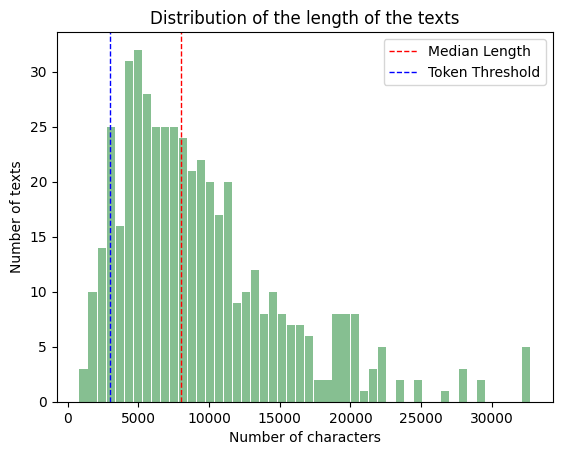

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# convert the text column to string type to estimate the length of the texts
df = df.astype({"text": str})
seq = [len(i) for i in df["text"]]
df["seq"] = seq

threshold = 3000
mean_length = np.mean(df["seq"])
median_length = np.median(df["seq"])

    # plot the histogram
    plt.hist(df["seq"], bins=50, color='#86bf91', zorder=2, rwidth=0.9)
    plt.title('Distribution of the length of the texts')
    plt.xlabel('Number of characters')
    plt.ylabel('Number of texts')

# add a vertical line for the median length
plt.axvline(median_length, color='r', linestyle='dashed', linewidth=1, label='Median Length')
plt.axvline(threshold, color='b', linestyle='dashed', linewidth=1, label='Token Threshold')

# display the legend
plt.legend()

# show the plot
plt.show()


In [3]:
df["limit"] = df["seq"].apply(lambda x: 1 if x < 3000 else 0)
df["limit"].value_counts()

0    448
1     39
Name: limit, dtype: int64

As we can see above it is an issue that text are long because our model here don't support much more than 1024 tokens (likely) so roughly 3000 characters or between 750-1000 words depending on the tokenizer. So before anything else we should try to make the input shorter.

In [4]:
df.to_csv(r'C:\Users\garsonj\Desktop\Finetuning\BERT\data\training_xlsx\NAO_texts_for_training.csv', index=False)

In [84]:
df_prime = df[['code', 
              'text', 
              # 'entreprise', 'AG', 'AG_cadres', 'AG_int', 'AG_ouv',
              # 'AI', 'AI_cadres', 'AI_int', 'AI_ouv', 
              'PPV', 'seq', 'limit']].copy()
df_prime.to_csv(r'C:\Users\garsonj\Desktop\Finetuning\BERT\data\_traing_xlsx\prime.xlsx', index=False)

OSError: Cannot save file into a non-existent directory: 'C:\Users\garsonj\Desktop\Finetuning\BERT\data\_traing_xlsx'

To evaluate which paragraph to keep either a scoring algorythm or manually. Scoring algorythm would be better since it would allow to generalize it

# Export to Label-Studio

Two columns with shortened text 

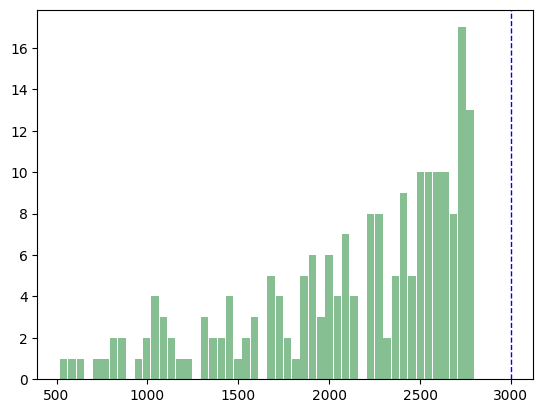

,text,AG
0,négociation annuelle obligatoire 2022-23. les ...,2.0
1,accord collectif d’entreprise à l’issue de la...,0.0
2,négociations annuelles obligatoires 2022 les ...,3.0
3,"la direction, a échangé avec les organisations...",0.0
4,accord relatif à la négociation annuelle oblig...,0.0
5,negociation annuelle obligatoire. les parties ...,0.0
6,il est conclu entre : la société gautier fra...,0.0
7,"cependant, dans un contexte économique global ...",6.0
8,la société vandemoortele europe france. cet ac...,3.0
9,proces-verbal d’accord portant sur la negociat...,0.0


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\garsonj\Desktop\Finetuning\BERT\data\training_xlsx\NAO_texts_for_training_raw.csv')[['text','AG']].iloc[:202]

df["seq"]=df["text"].apply(lambda x: len(x))
threshold = 3000

plt.hist((df['seq']), bins=50, color='#86bf91', zorder=2, rwidth=0.9)
plt.axvline(threshold, color='b', linestyle='dashed', linewidth=1, label='Token Threshold')
plt.show()

df = df[['text','AG']].replace(np.nan, 0, regex=True)
df['AG'] = df['AG'].str.replace(',', '.').astype(float).replace(np.nan, 0, regex=True).apply(lambda x: x*100)
df.head(10)
df.to_csv(r'C:\Users\garsonj\Desktop\NAO_texts_for_training.csv', index=False)


one column, because two columns seems not be operative

In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\garsonj\Desktop\spacy_finetuning\spacy_files\data\training_csv\NAO_texts_for_training_F.csv')[['text']].iloc[202:]

df.tail(10)
df.to_csv(r'C:\Users\garsonj\Desktop\spacy_finetuning\spacy_files\data\training_csv\NAO_texts_raw_202_474.csv', index=False)

## Merging files

In [62]:
import pandas as pd

# df_comp = pd.read_excel(r"C:\Users\garsonj\Desktop\spacy_finetuning\spacy_files\data\training_xlsx\compilation_2023.xlsx")
df_samp = pd.read_excel(r"C:\Users\garsonj\Desktop\spacy_finetuning\spacy_files\data\training_xlsx\sample2023.xlsx")

In [63]:
df_samp.columns
df_samp_final = df_samp[[
    'UrlLegifrance', 
    'Entreprise', 
    'Siret', 
    'Secteur', 
    # 'Nature', 
    # 'Titre',
    'Naf732', 
    'Date Texte', 
    # 'Date Maj', 
    # 'Date Dépot', 
    # 'Date diffusion',
    # 'Date fin', 
    # 'LesSyndicats', 
    # 'LesThemes', 
    # 'type',
    'Tranche Effectif(Base siren)', 
    'Fichier', 
    # 'ID'
    ]].copy()
df_samp_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   UrlLegifrance                 124 non-null    object        
 1   Entreprise                    124 non-null    object        
 2   Siret                         124 non-null    int64         
 3   Secteur                       124 non-null    object        
 4   Naf732                        124 non-null    object        
 5   Date Texte                    124 non-null    datetime64[ns]
 6   Tranche Effectif(Base siren)  124 non-null    object        
 7   Fichier                       124 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 7.9+ KB


In [64]:
# Add a column for the application year
df_samp_final["Année d'application NAO"] = 2023
df_samp_final["code"] = df_samp_final["Fichier"].str.slice(101,113)
df_samp_final.head(10)

# Reorder the columns
df_samp_final.columns
df_samp_final = df_samp_final[[
    # 'UrlLegifrance',
    'code',
    'Entreprise', 
    'Siret', 
    'Secteur', 
    'Naf732', 
    'Date Texte',
    "Année d'application NAO",
    'Tranche Effectif(Base siren)', 
    ]].copy()

# Rename the columns
df_samp_final.columns = ["code","Nom de l'entreprise", "Siret", "Sous secteur Secafi", "Code NAF", "Date de l'accord du texte", "Année d'application NAO", "Tranche Effectif (Base siren)"]

df_samp_final.head(10)
df_samp_final.to_excel(r"C:\Users\garsonj\Desktop\spacy_finetuning\spacy_files\data\training_xlsx\sample_2023_no_txt.xlsx", index=False)

In [40]:
#We adapt the compilation file to the same format

df_comp.columns
df_comp_final = df_comp[[
    "Nom de l'entreprise ", 
    'Siret', 
    'Sous secteur Secafi ', 
    # 'Secteur NAF ',
    'Code NAF', 
    "Date de l'accord du texte", 
    "Année d'application NAO",
    'Tranche Effectif (Base siren)',
    'Augmentations générales-Toutes catégories confondues ',
    'Augmentations générales-Cadres/ingénieurs',
    'Augmentations générales-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
    'Augmentations générales-Ouviers, employés ou autres ',
    'Augmentations générales-Talon (€)',
    'Augmentations individuelles-Toutes catégories confondues ',
    'Augmentations individuelles-Cadres/ingénieurs',
    'Augmentations individuelles-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
    'Augmentations individuelles-Ouviers, employés ou autres ',
    'Augmentations individuelles-Talon (€)',
    'Augmentations totales (AI + AG)-Toutes catégories confondues ',
    'Augmentations totales (AI + AG)-Cadres/ingénieurs',
    'Augmentations totales (AI + AG)-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
    'Augmentations totales (AI + AG)-Ouviers, employés ou autres ',
    'Augmentations totales (AI + AG)-Talon (€)', 
    'Primes -Pepa ou autres ',
    'Primes Pepa ou autres-Montant en € ',
    "Elements exceptionnels liés à l'inflation ? Prime transport ou autre ",
    'Commentaires-Divers', 
    'Lien '
    ]].copy()

#We change the column names to match the sample file

column_names = {"Nom de l'entreprise " : "Nom de l'entreprise", "Sous secteur Secafi ":"Sous secteur Secafi"}
df_comp_final = df_comp_final.rename(columns=column_names)

df_comp_final.columns

Index(['Nom de l'entreprise', 'Siret', 'Sous secteur Secafi', 'Code NAF',
       'Date de l'accord du texte', 'Année d'application NAO',
       'Tranche Effectif (Base siren)',
       'Augmentations générales-Toutes catégories confondues ',
       'Augmentations générales-Cadres/ingénieurs',
       'Augmentations générales-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
       'Augmentations générales-Ouviers, employés ou autres ',
       'Augmentations générales-Talon (€)',
       'Augmentations individuelles-Toutes catégories confondues ',
       'Augmentations individuelles-Cadres/ingénieurs',
       'Augmentations individuelles-Professions intermédiaires (techniciens, agents de maitrise, ou autres) ',
       'Augmentations individuelles-Ouviers, employés ou autres ',
       'Augmentations individuelles-Talon (€)',
       'Augmentations totales (AI + AG)-Toutes catégories confondues ',
       'Augmentations totales (AI + AG)-Cadres/ingénieurs',
       'Aug

In [47]:
# We concat the two files

df_final = pd.concat([df_samp_final, df_comp_final], axis=0, ignore_index=True)
df_final.to_excel(r'C:\Users\garsonj\Desktop\spacy_finetuning\spacy_files\data\training_xlsx\NAO_2023.xlsx', index=False)